<a href="https://colab.research.google.com/github/pavanitirumalasetty/TaxiData-Capstone-Project/blob/main/Final_Taxidata_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading all the necessary packages and data into dataframe:

In [ ]:
# loading packages accordingly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

1. Loading the .csv file:

In [ ]:
# loading the csv data
data = pd.read_csv('sample_data/yellow_tripdata_2022-01.csv')
data

<ipython-input-87-08c0d7cc0ae8>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sample_data/yellow_tripdata_2022-01.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,NaN,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,NaN,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,NaN,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,NaN,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


2. Loading the data into dataframe:

In [ ]:
# loading the data into dataframe
data_df = pd.DataFrame(data)
print(data_df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2463926         2  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927         2  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928         2  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929         2  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930         2  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN   

         trip_distance  Rat

# Data Pre-processing:

1. Finding out the number of rows and number of columns in the dataset (df.shape):

In [ ]:
# returns the dimension of the dataset
num_rows, num_cols = data_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 2463931
Number of columns: 19


2. Displays the columns in the dataset (df.columns):

In [ ]:
# columns in the taxi dataset
for column in data_df.columns:
    print(column)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


3. Displays the datatypes of the columns in dataset (df.dtypes):

In [ ]:
# gets the data types of the columns
for column_types in data_df.dtypes:
  print(column_types)

int64
object
object
float64
float64
float64
object
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64


4. Displays the information of the dataset (df.info):

In [ ]:
# info of the dataset
data_info = data_df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 357.2+ MB
None


# Exploratory Data Analysis:

1. Checking for NA values and removing it accordingly:
Below is the result of missing values and result of missing values after removal.

In [ ]:
#Checking for missing values in the DataFrame
if data_df is not None:
    print("Number of missing values in columns before removal:")
    print(data_df.isnull().sum())

    # removing rows with missing values
    data_df.dropna(inplace=True)

    print("\nNumber of missing values in columns after removal:")
    print(data_df.isnull().sum())
else:
    print("Failed to load data. Check the file.")

Number of missing values in columns before removal:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

Number of missing values in columns after removal:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount             

2. Removing un-necessary columns from the dataset:

In [ ]:
# Remove unnecessary columns
if 'tolls_amount' in data_df.columns:
    # Removing the 'tolls_amount' column
    data_df.drop(columns=['tolls_amount'], inplace=True)

print(data_df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2392423         1  2022-01-31 23:24:28   2022-01-31 23:32:47              1.0   
2392424         2  2022-01-31 23:17:44   2022-01-31 23:22:05              1.0   
2392425         2  2022-01-31 23:26:41   2022-01-31 23:34:54              1.0   
2392426         2  2022-01-31 23:37:41   2022-01-31 23:45:26              1.0   
2392427         2  2022-01-31 23:43:22   2022-01-31 23:55:36              1.0   

         trip_distance  Rat

# Descriptive Statistics:

1. Displaying the statistics such as count, mean, standard deviation, min, max and, 25th percentile (25%), median (50th percentile or 50%), and 75th percentile (75%).
The 25th, 50th, and 75th percentiles are statistical measures used to describe the distribution of a dataset.

In [ ]:
# Summary statistics for numerical variables
print(data_df.describe())

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.392428e+06     2.392428e+06   2.392428e+06  2.392428e+06   
mean   1.697032e+00     1.389453e+00   3.099698e+00  1.415507e+00   
std    4.595418e-01     9.829686e-01   4.308517e+00  5.917573e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.030000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.710000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.100000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   6.510000e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.392428e+06  2.392428e+06  2.392428e+06  2.392428e+06  2.392428e+06   
mean   1.659911e+02  1.637749e+02  1.230148e+00  1.280723e+01  1.034301e+00   
std    6.515313e+01  7.071530e+01  4.623205e-01  2.595991e+02  1.243128e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -4.800000e+02 

# Visualizations to understand Data:

## Slecting relevant features to visualize the data

In [ ]:
# Identifying the top locations for pickups and drop-offs
top_pickup_locations = data_df['PULocationID'].value_counts().head(30)
top_dropoff_locations = data_df['DOLocationID'].value_counts().head(30)

In [ ]:
data_df['pickup_datetime'] = pd.to_datetime(data_df['tpep_pickup_datetime'])
data_df['dropoff_datetime'] = pd.to_datetime(data_df['tpep_dropoff_datetime'])
data_df['pickup_hour'] = data_df['pickup_datetime'].dt.hour
data_df['pickup_dayofweek'] = data_df['pickup_datetime'].dt.dayofweek
fare_by_hour = data_df.groupby('pickup_hour')['fare_amount'].mean()

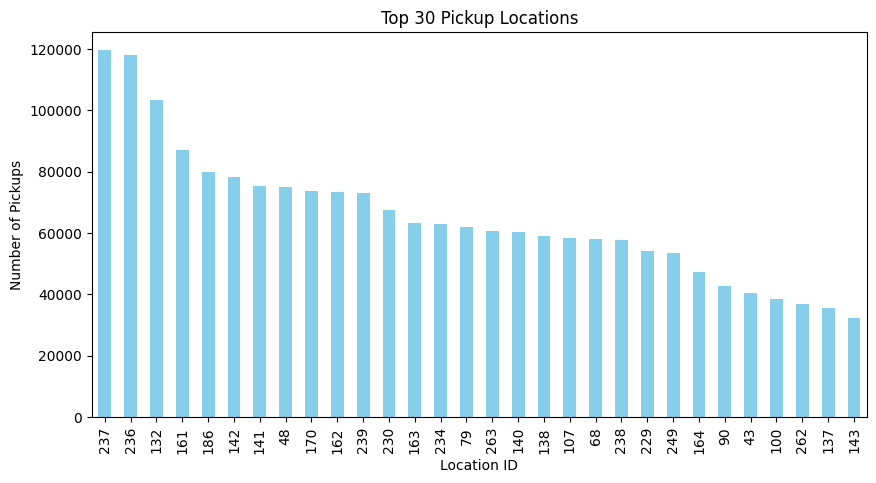

In [ ]:
# Here we are plotting the top pickup locations
plt.figure(figsize=(10, 5))
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 30 Pickup Locations')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.show()

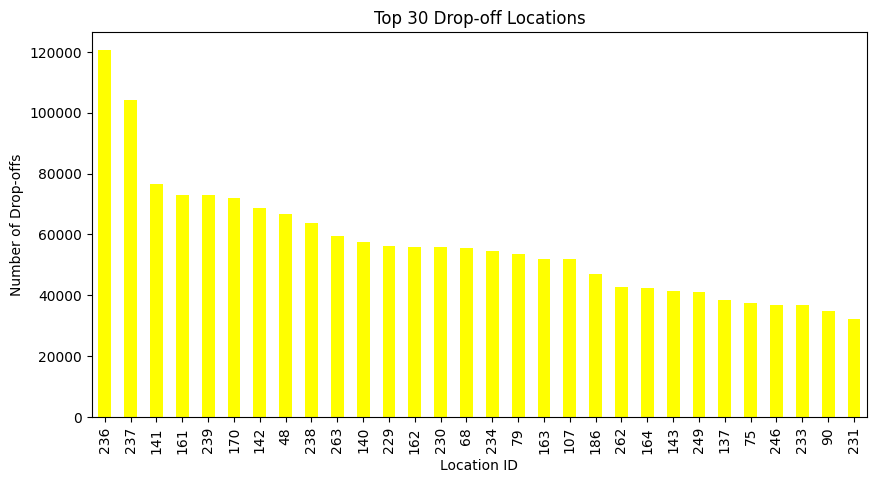

In [ ]:
# Here we are plotting the top drop-off locations
plt.figure(figsize=(10, 5))
top_dropoff_locations.plot(kind='bar', color='yellow')
plt.title('Top 30 Drop-off Locations')
plt.xlabel('Location ID')
plt.ylabel('Number of Drop-offs')
plt.show()

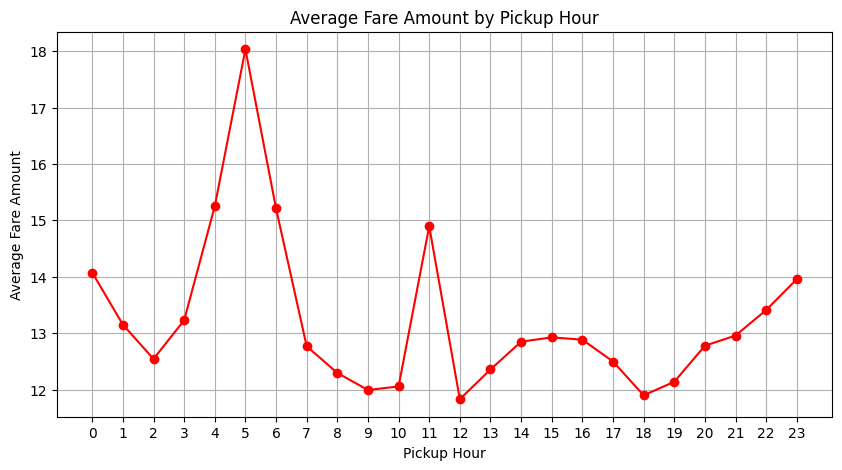

In [ ]:
# Plotting and presenting Average Fare amount by Pick-up hour
fare_by_hour.plot(marker='o', color='red', figsize=(10, 5))
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Pickup Hour')
plt.xticks(np.arange(24))
plt.grid(True)
plt.show()

In [ ]:
# Extracting day of the week from pickup datetime
data_df['pickup_dayofweek'] = data_df['pickup_datetime'].dt.dayofweek

# Defining a function to categorize days as weekends (Saturday and Sunday) or weekdays
def categorize_day(day):
    if day < 5:  #It is Monday to Friday
        return 'Weekday'
    else:       #It is Saturday and Sunday
        return 'Weekend'

# Creating a new column for weekend/weekday categorization
data_df['day_category'] = data_df['pickup_dayofweek'].apply(categorize_day)

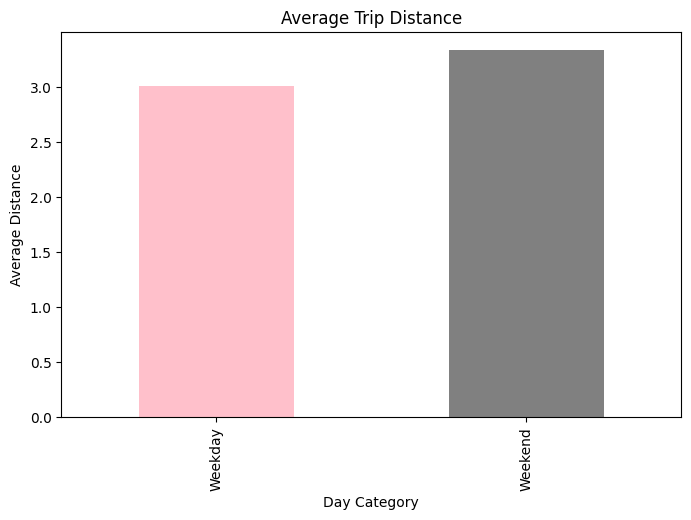

In [ ]:
# Plotting the Average Trip Distance
plt.figure(figsize=(8, 5))
data_df.groupby('day_category')['trip_distance'].mean().plot(kind='bar', color=['pink', 'grey'])
plt.title('Average Trip Distance')
plt.xlabel('Day Category')
plt.ylabel('Average Distance')
plt.show()

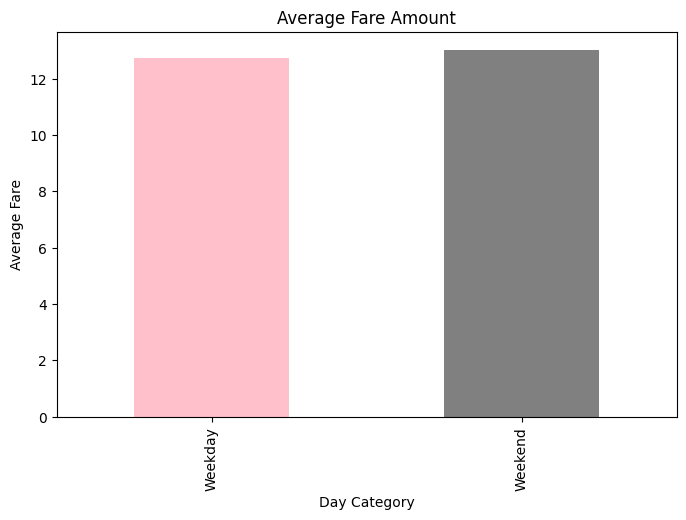

In [ ]:
# Plotting the Average Fare Amount
plt.figure(figsize=(8, 5))
data_df.groupby('day_category')['fare_amount'].mean().plot(kind='bar', color=['pink', 'grey'])
plt.title('Average Fare Amount')
plt.xlabel('Day Category')
plt.ylabel('Average Fare')
plt.show()

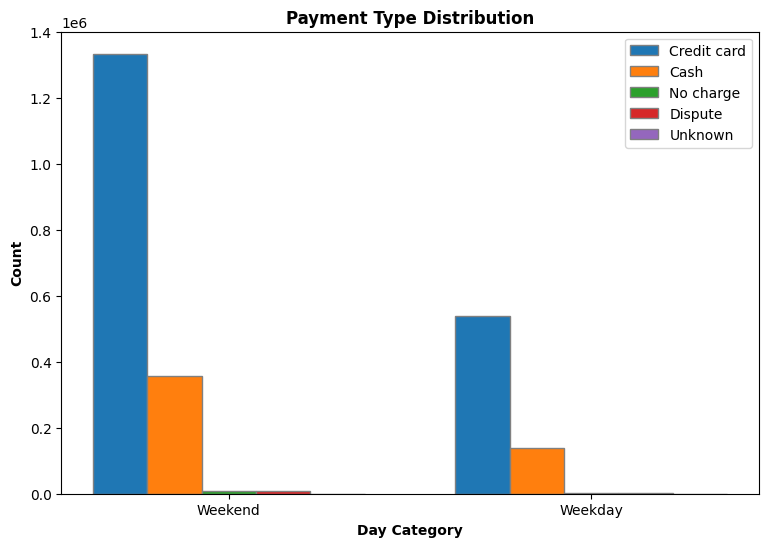

In [ ]:
# Define payment labels
payment_labels = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown'}

# Grouped bar chart
fig, ax = plt.subplots(figsize=(9, 6))

# Define bar width
bar_width = 0.15

# Set position of bar on X axis
r1 = np.arange(len(data_df['day_category'].unique()))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Plotting bars for each payment type
for i in range(1, 6):
    counts = data_df[data_df['payment_type'] == i].groupby('day_category').size().tolist()
    plt.bar(r1 if i == 1 else r2 if i == 2 else r3 if i == 3 else r4 if i == 4 else r5,
            counts, color='C'+str(i-1), width=bar_width, edgecolor='grey', label=payment_labels[i])

# Add xticks on the middle of the group bars
plt.xlabel('Day Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Payment Type Distribution', fontweight='bold')
plt.xticks([r + bar_width * 2 for r in range(len(data_df['day_category'].unique()))],
           data_df['day_category'].unique())

# Create legend
plt.legend()

# Show plot
plt.show()

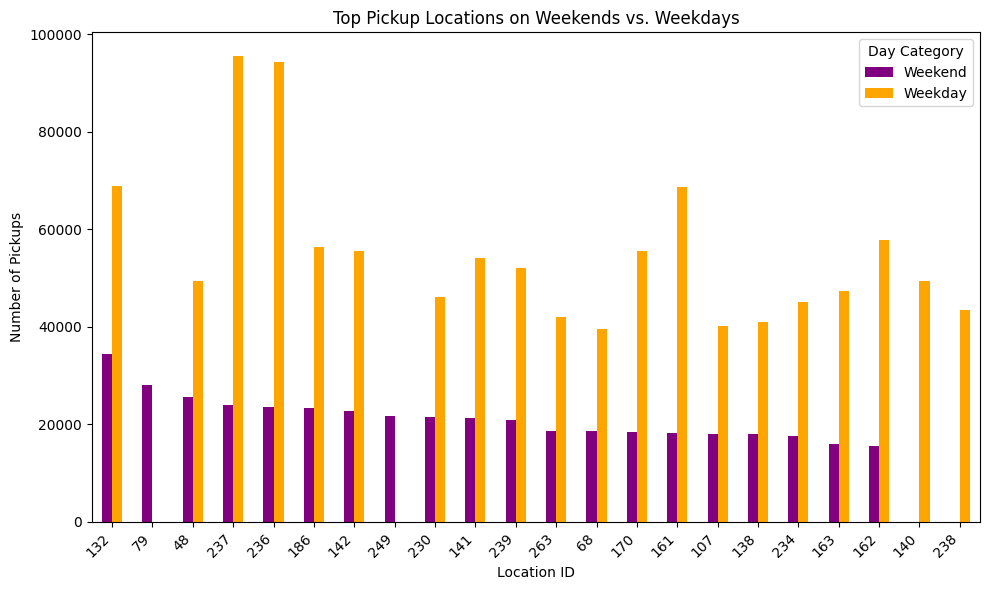

In [ ]:
# Get the top pickup locations for weekends and weekdays
weekend_pickup_counts = data_df[data_df['day_category'] == 'Weekend']['PULocationID'].value_counts().head(20)
weekday_pickup_counts = data_df[data_df['day_category'] == 'Weekday']['PULocationID'].value_counts().head(20)

# Combining pickup counts for both weekends and weekdays
combined_pickup_counts = pd.concat([weekend_pickup_counts, weekday_pickup_counts], axis=1)
combined_pickup_counts.columns = ['Weekend', 'Weekday']

# Plotting the combined data
combined_pickup_counts.plot(kind='bar', figsize=(10, 6), color=['purple', 'orange'])
plt.title('Top Pickup Locations on Weekends vs. Weekdays')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day Category')

# Show the plot
plt.tight_layout()
plt.show()

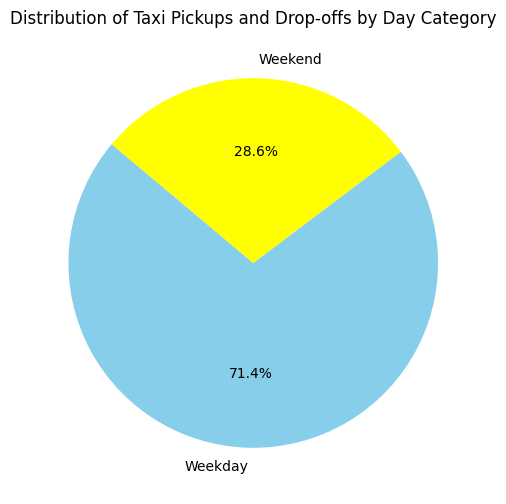

In [ ]:
# Calculate total counts of pickups and drop-offs for each day category
total_counts = data_df.groupby(['pickup_dayofweek', 'day_category']).size().unstack(fill_value=0).sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_counts, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellow'])
plt.title('Distribution of Taxi Pickups and Drop-offs by Day Category')
plt.show()

# Data Modeling & Predictions

## GradientBoostingRegressor Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# features and target variable
features = ['PULocationID','trip_distance']  # Features to use for prediction
target = 'fare_amount'  # Target variable to predict (can be any relevant feature)

# Split the dataset into features (X) and target variable (y)
X = data_df[features]
y = data_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = gbr_model.predict(X_test)

# Calculating Mean Squared Error
mse_gb = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse_gb)
rmse_gb = np.sqrt(mse_gb)
print("Root Mean Squared Error:", rmse_gb)
mae_gb = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae_gb)
r2_gb = r2_score(y_test, predictions)
print("R-squared (R²):", r2_gb)

Mean Squared Error: 44.35907375105672
Root Mean Squared Error: 6.660260787015529
Mean Absolute Error: 1.9710970632527354
R-squared (R²): 0.7079330336313479


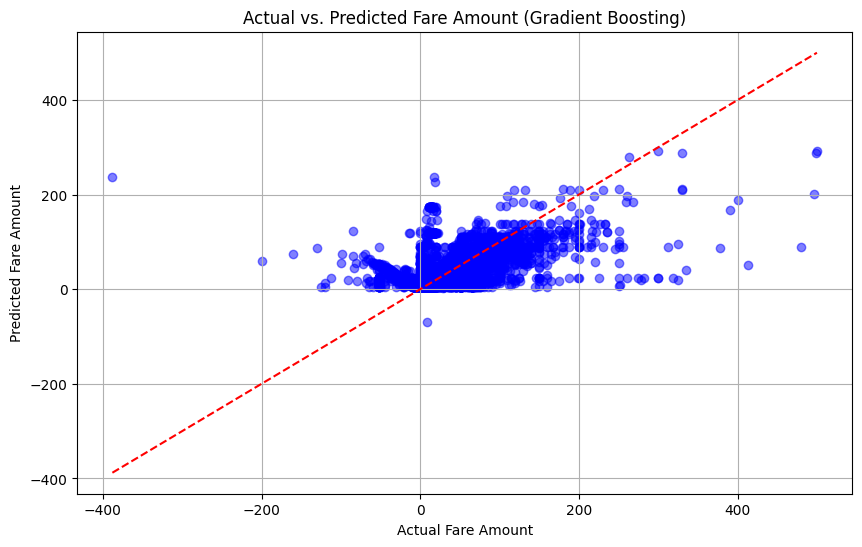

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Fare Amount (Gradient Boosting)')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.grid(True)
plt.show()



## Performing GradientBoostingRegressor Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target variable
features = ['trip_distance', 'pickup_dayofweek']  # Features to use for prediction
target = 'fare_amount'  # Target variable to predict

# Split the dataset into features (X) and target variable (y)
X = data_df[features]
y = data_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = gbr_model.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse_gb)
rmse_gb = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse_gb)
mae_gb = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae_gb)
r2_gb = r2_score(y_test, predictions)
print("R-squared (R²):", r2_gb)


Mean Squared Error: 49.127448985448254
Root Mean Squared Error: 7.009097587096948
Mean Absolute Error: 1.912119786324715
R-squared (R²): 0.6765373174576536


## Performing Linear Regression Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data Preprocessing
X = data_df[['trip_distance', 'pickup_dayofweek']]
# One-hot encoding for pickup_dayofweek
X = pd.get_dummies(X, columns=['pickup_dayofweek'], drop_first=True)
y = data_df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared (R²):", r2)

# Displaying the coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Calculating the average fare amount for weekdays and weekends
weekdays_avg_fare = data_df[data_df['pickup_dayofweek'] < 5]['fare_amount'].mean()
weekends_avg_fare = data_df[data_df['pickup_dayofweek'] >= 5]['fare_amount'].mean()
print("Average fare amount on weekdays:", weekdays_avg_fare)
print("Average fare amount on weekends:", weekends_avg_fare)


Mean Squared Error: 48.451840768470035
Root Mean Squared Error: 6.960735648512306
Mean Absolute Error: 2.279661677650934
R-squared (R²): 0.6809856259028194
              Feature  Coefficient
0       trip_distance     2.385006
1  pickup_dayofweek_1    -0.058628
2  pickup_dayofweek_2    -0.016522
3  pickup_dayofweek_3     0.118513
4  pickup_dayofweek_4     1.583334
5  pickup_dayofweek_5    -0.221387
6  pickup_dayofweek_6    -0.192554
Average fare amount on weekdays: 12.724712174451655
Average fare amount on weekends: 13.013206836083059


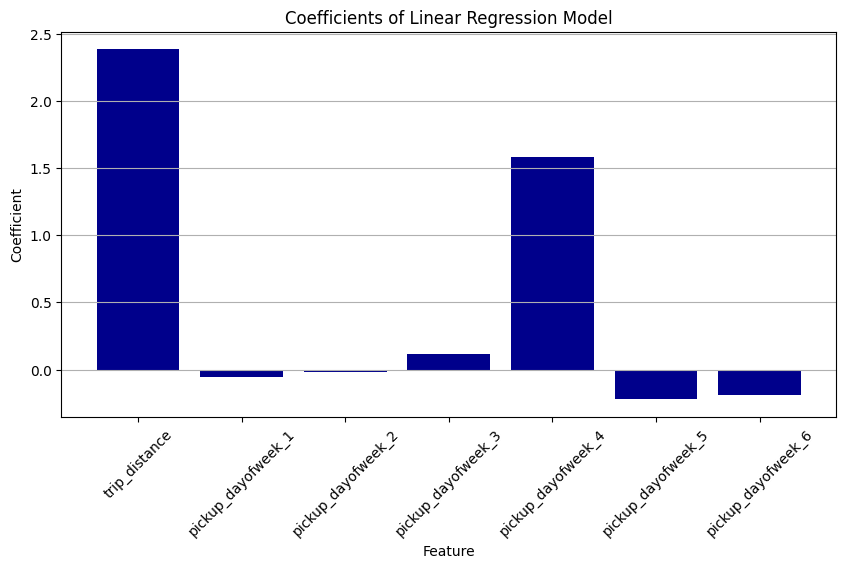

In [ ]:
# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='darkblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Linear Regression Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Plot comparing Model Metrics of GradientboostingRegressor & linear regressor Modeling

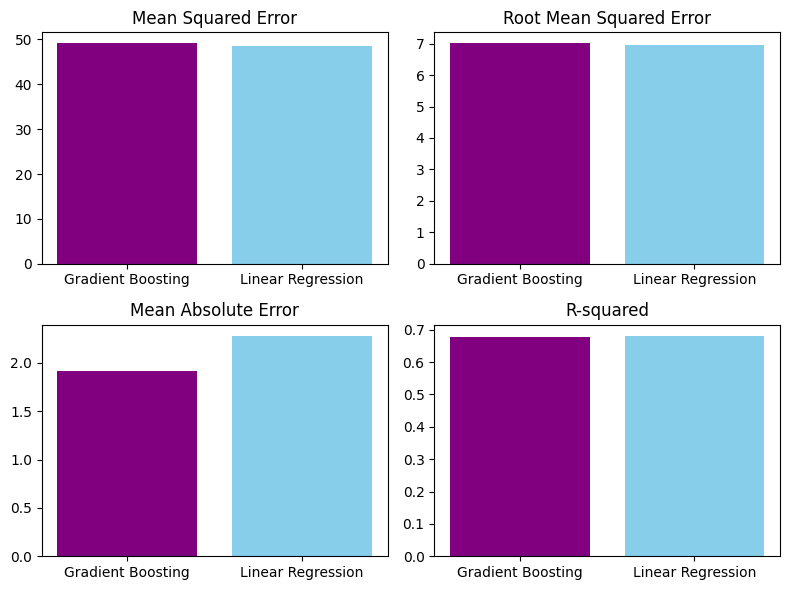

In [ ]:
import matplotlib.pyplot as plt

# Define the MSE values
mse_values = [mse_gb, mse]  # MSE values for Gradient Boosting and linear regressor Models
mae_values = [mae_gb, mae]
rmse_values = [rmse_gb, rmse]
r2_values = [r2_gb, r2]

# Define the models
models = ['Gradient Boosting','Linear Regression']

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Mean Squared Error
ax[0, 0].bar(models, mse_values, color=['purple', 'skyblue'])
ax[0, 0].set_title('Mean Squared Error')

# Root Mean Squared Error
ax[0, 1].bar(models, rmse_values, color=['purple', 'skyblue'])
ax[0, 1].set_title('Root Mean Squared Error')

# Mean Absolute Error
ax[1, 0].bar(models, mae_values, color=['purple', 'skyblue'])
ax[1, 0].set_title('Mean Absolute Error')

# R-squared
ax[1, 1].bar(models, r2_values, color=['purple', 'skyblue'])
ax[1, 1].set_title('R-squared')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

fare_amount              1.000000
total_amount             0.999878
trip_distance            0.039426
airport_fee              0.027218
tip_amount               0.024196
improvement_surcharge    0.007016
RatecodeID               0.006774
payment_type             0.001415
extra                    0.001168
passenger_count          0.000808
pickup_dayofweek         0.000614
mta_tax                 -0.000275
pickup_hour             -0.000581
VendorID                -0.000987
DOLocationID            -0.004258
PULocationID            -0.005441
congestion_surcharge    -0.011507
Name: fare_amount, dtype: float64


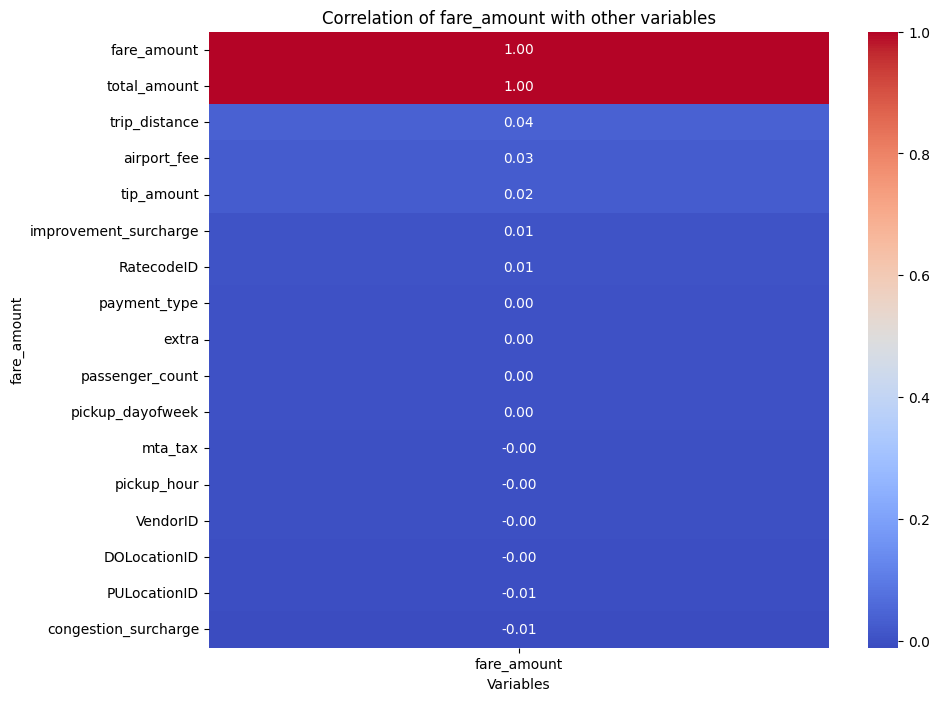

In [ ]:
# Exclude non-numeric columns from the correlation calculation
numeric_cols = data_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
fare_corr = data_df[numeric_cols].corr()['fare_amount'].sort_values(ascending=False)

# Print the correlation values
print(fare_corr)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fare_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of fare_amount with other variables')
plt.xlabel('Variables')
plt.ylabel('fare_amount')
plt.show()
